##### Data As we can see in the first rows below the dataset has 9 feature columns and a target column. The feature columms are :

##### Step: This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.
##### Customer: This feature represents the customer id
##### zipCodeOrigin: The zip code of origin/source.
##### Merchant: The merchant's id
##### zipMerchant: The merchant's zip code
##### Age: Categorized age
##### 0: <= 18,
##### 1: 19-25,
##### 2: 26-35,
##### 3: 36-45,
##### 4: 46:55,
##### 5: 56:65,
#### 6: > 65
##### U: Unknown
##### Gender: Gender for customer
##### E : Enterprise,
##### F: Female,
##### M: Male,
##### U: Unknown
##### Category: Category of the purchase. I won't write all categories here, we'll see them later in the analysis.
##### Amount: Amount of the purchase
##### Fraud: Target variable which shows if the transaction fraudulent(1) or benign(0)


In [1]:
#Load packages 


## Data loading, processing and for more
import numpy as np 
import pandas as pd

import os

## Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm_notebook
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
#read our Data 
data1=pd.read_csv('bs140513_032310.csv')

In [3]:
vv=pd.read_csv('bsNET140513_032310.csv')

In [4]:
#show the first 5 rows
data1.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [5]:
# we are trying to rename these columns 
data1.rename(columns={'category':'Typetrans'},inplace=True)
data1.rename(columns={'customer':'customerId'},inplace=True)
data1.rename(columns={'merchant':'merchantId'},inplace=True)

In [6]:
data1.head()

,step,customerId,age,gender,zipcodeOri,merchantId,zipMerchant,Typetrans,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [7]:
data1.shape

(594643, 10)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customerId   594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchantId   594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   Typetrans    594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [9]:
#count Null values
data1.isnull().sum()

step           0
customerId     0
age            0
gender         0
zipcodeOri     0
merchantId     0
zipMerchant    0
Typetrans      0
amount         0
fraud          0
dtype: int64

In [10]:
# count unique column values
col_dicts ={}
for col in data1.columns:
  print(f"{col} = {data1[col].nunique()}")

step = 180
customerId = 4112
age = 8
gender = 4
zipcodeOri = 1
merchantId = 50
zipMerchant = 1
Typetrans = 15
amount = 23767
fraud = 2


In [11]:
# count fraud values from the fraud column
fraude=data1['fraud'].value_counts()

<AxesSubplot:ylabel='fraud'>

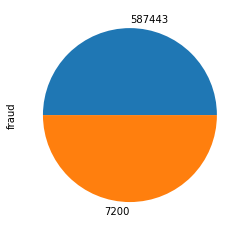

In [12]:
#plot fraud values
fraude.value_counts().plot(kind="pie")

In [14]:
# first we create a fraud data and second we create a non-fraud data
fraud1 = data1.loc[data1.fraud == 1]
no_fraud = data1.loc[data1.fraud == 0]

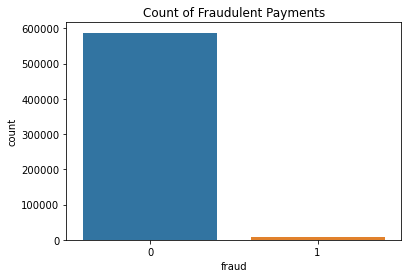

Number of normal examples:  7200
Number of fradulent examples:  587443


In [15]:
sns.countplot(x='fraud',data=data1)
plt.title("Count of Fraudulent Payments")
plt.show()

print("Number of normal examples: ",fraud1.fraud.count())
print("Number of fradulent examples: ",no_fraud.fraud.count())

In [17]:
## here the mean of the fraudulent amount by the type of categories
fraud_percent=fraud1.groupby('Typetrans')['amount'].mean()

In [18]:
## here the mean of the non-fraudulent amount by the type of categories
no_fraud_percent=no_fraud.groupby('Typetrans')['amount'].mean()

In [19]:
# here the mean of fraudulent by the type of categories
one=data1.groupby('Typetrans')['fraud'].mean()*100

In [20]:

fraud_percent

Typetrans
'es_barsandrestaurants'     164.092667
'es_fashion'                247.008190
'es_health'                 407.031338
'es_home'                   457.484834
'es_hotelservices'          421.823339
'es_hyper'                  169.255429
'es_leisure'                300.286878
'es_otherservices'          316.469605
'es_sportsandtoys'          345.366811
'es_tech'                   415.274114
'es_travel'                2660.802872
'es_wellnessandbeauty'      229.422535
Name: amount, dtype: float64

In [21]:
no_fraud_percent
#shit1

Typetrans
'es_barsandrestaurants'     41.145997
'es_contents'               44.547571
'es_fashion'                62.347674
'es_food'                   37.070405
'es_health'                103.737228
'es_home'                  113.338409
'es_hotelservices'         106.548545
'es_hyper'                  40.037145
'es_leisure'                73.230400
'es_otherservices'          75.685497
'es_sportsandtoys'          88.502738
'es_tech'                   99.924638
'es_transportation'         26.958187
'es_travel'                669.025533
'es_wellnessandbeauty'      57.320219
Name: amount, dtype: float64

In [22]:
one

Typetrans
'es_barsandrestaurants'     1.882944
'es_contents'               0.000000
'es_fashion'                1.797335
'es_food'                   0.000000
'es_health'                10.512614
'es_home'                  15.206445
'es_hotelservices'         31.422018
'es_hyper'                  4.591669
'es_leisure'               94.989980
'es_otherservices'         25.000000
'es_sportsandtoys'         49.525237
'es_tech'                   6.666667
'es_transportation'         0.000000
'es_travel'                79.395604
'es_wellnessandbeauty'      4.759380
Name: fraud, dtype: float64

In [23]:
# we concat all the three upper Datas
pd.concat([fraud_percent,no_fraud_percent,one],keys=["Fraudulent","Non-Fraudulent","Percent(%)"],axis=1,
sort=False).sort_values(by=['Non-Fraudulent'])

,Fraudulent,Non-Fraudulent,Percent(%)
'es_transportation',NaN,26.958187,0.000000
'es_food',NaN,37.070405,0.000000
'es_hyper',169.255429,40.037145,4.591669
'es_barsandrestaurants',164.092667,41.145997,1.882944
'es_contents',NaN,44.547571,0.000000
'es_wellnessandbeauty',229.422535,57.320219,4.759380
'es_fashion',247.008190,62.347674,1.797335
'es_leisure',300.286878,73.230400,94.989980
'es_otherservices',316.469605,75.685497,25.000000
'es_sportsandtoys',345.366811,88.502738,49.525237


In [24]:
def plot_count(df, feature, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(3*size,2*size))
    total = float(len(df))
    sns.countplot(df[feature],order = df[feature].value_counts().index, palette='Set3')
    plt.title(title)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



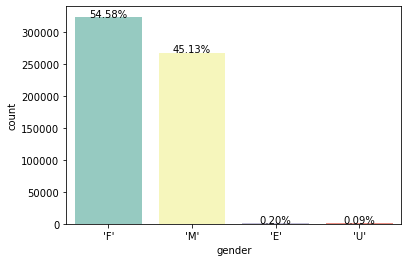

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



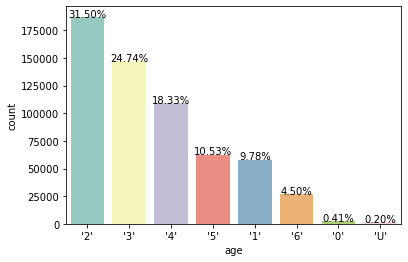

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



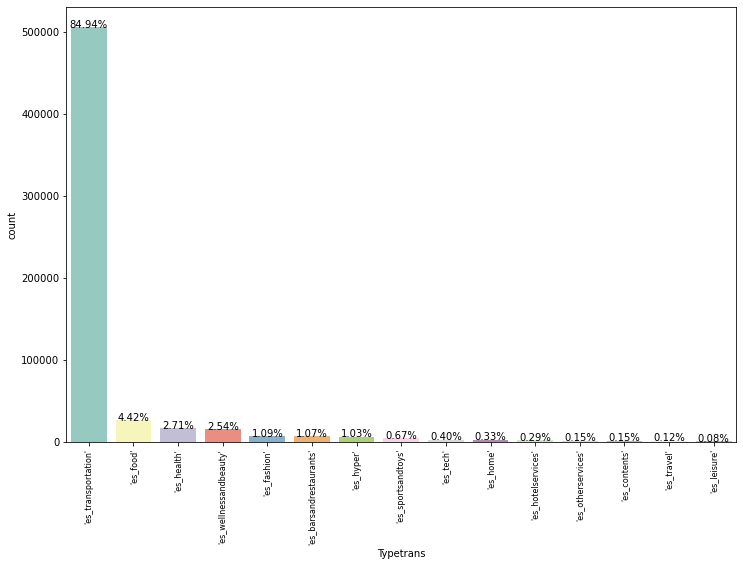

In [25]:
plot_count(data1,'gender')
plot_count(data1,'age')
plot_count(data1,'Typetrans',size=4)

In [26]:
data1

,step,customerId,age,gender,zipcodeOri,merchantId,zipMerchant,Typetrans,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


No handles with labels found to put in legend.


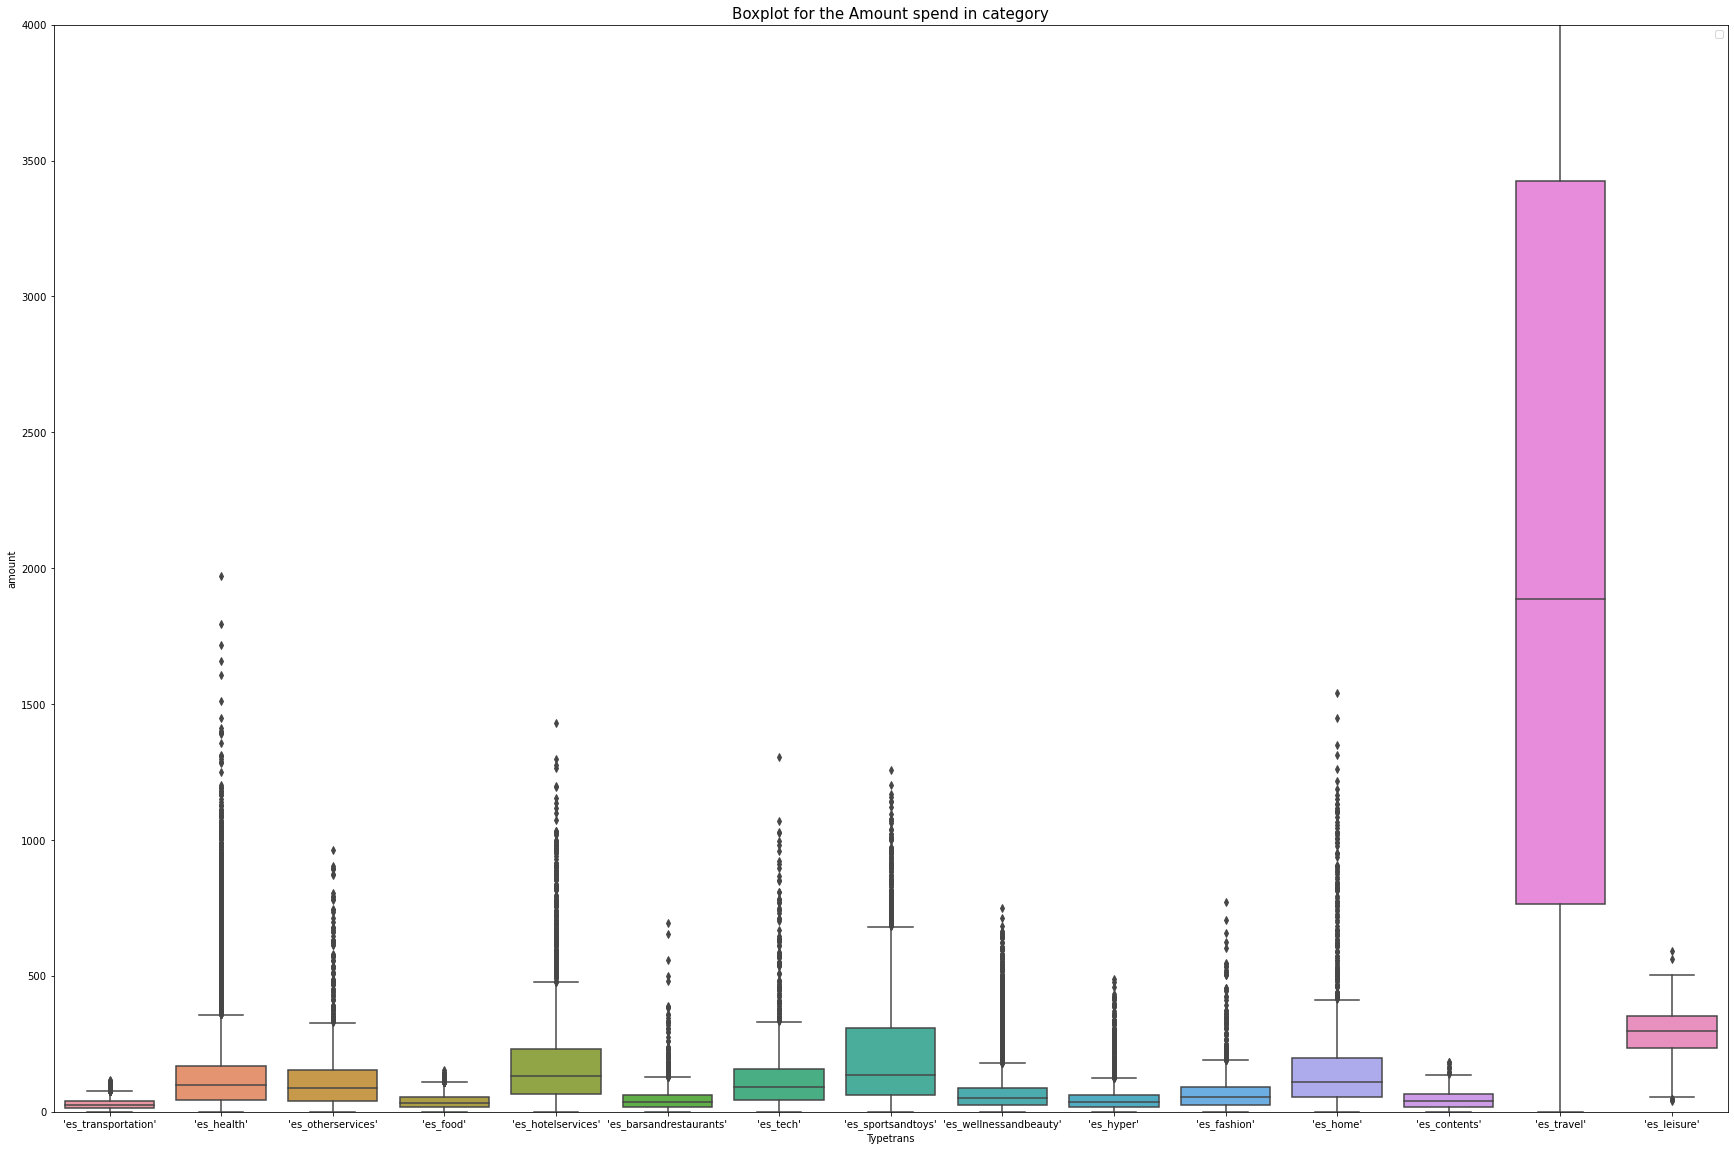

In [43]:
plt.figure(figsize=(30,20))
sns.boxplot(x=data1.Typetrans,y=data1.amount)
plt.title("Boxplot for the Amount spend in category",size=15)
plt.ylim(0,4000)
plt.legend()
plt.show()

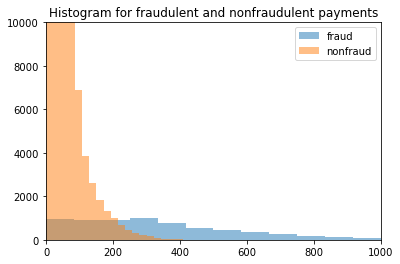

In [29]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(fraud1.amount, alpha=0.5, label='fraud',bins=100)
plt.hist(no_fraud.amount, alpha=0.5, label='nonfraud',bins=100)
plt.title("Histogram for fraudulent and nonfraudulent payments")
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

In [103]:
## here the mean percent of fraud by age 
F_age=(data1.groupby('age')['fraud'].mean()*100).reset_index().sort_values(by='fraud')
F_age

,age,fraud
7,'U',0.594228
6,'6',0.974826
5,'5',1.095112
1,'1',1.185254
3,'3',1.192815
2,'2',1.251401
4,'4',1.293281
0,'0',1.957586


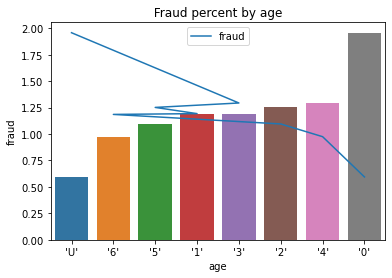

In [128]:
F_age.plot()
plt.title(" Fraud percent by age ")
sns.barplot(x=F_age.age,y=F_age.fraud)
plt.show()

In [108]:
# here the mean percent of fraud by gender 
F_gender=(data1.groupby('gender')['fraud'].mean()*100).reset_index().sort_values(by='fraud')
F_gender

,gender,fraud
3,'U',0.000000
0,'E',0.594228
2,'M',0.907279
1,'F',1.465962


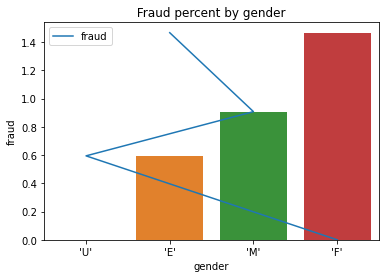

In [92]:
#
F_gender.plot()
plt.title(" Fraud percent by gender ")
sns.barplot(x=F_gender.gender,y=F_gender.fraud)
plt.show()

In [112]:
# groupby between fraud and categories to see the mean percent by categories 
F_Typetrans=(data1.groupby('Typetrans')['fraud'].mean()*100).reset_index().sort_values(by='fraud')
F_Typetrans

,Typetrans,fraud
1,'es_contents',0.000000
3,'es_food',0.000000
12,'es_transportation',0.000000
2,'es_fashion',1.797335
0,'es_barsandrestaurants',1.882944
7,'es_hyper',4.591669
14,'es_wellnessandbeauty',4.759380
11,'es_tech',6.666667
4,'es_health',10.512614
5,'es_home',15.206445


In [124]:
def plot_distplot_grouped(df, feature):
    classes = list(df[feature].unique())
    print(classes)
    group_labels = []     
    hist_data = []
    for item in classes:
        crt_class = df.loc[df[feature]==item]["step"]
        group_labels.append(f"{item}")
        hist_data.append(crt_class)
    fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
    fig['layout'].update(title=f'Payments Transactions Time Density Plot - grouped by `{feature}`', xaxis=dict(title='Time [step]'))
    iplot(fig, filename='dist_only')  

In [121]:
 plot_distplot_grouped(data1, 'fraud')

[0, 1]


In [117]:
 plot_distplot_grouped(data1, 'age')

["'4'", "'2'", "'3'", "'5'", "'1'", "'6'", "'U'", "'0'"]


In [125]:
plot_distplot_grouped(data1, 'gender')

["'M'", "'F'", "'E'", "'U'"]


In [126]:
plot_distplot_grouped(data1, 'Typetrans')

["'es_transportation'", "'es_health'", "'es_otherservices'", "'es_food'", "'es_hotelservices'", "'es_barsandrestaurants'", "'es_tech'", "'es_sportsandtoys'", "'es_wellnessandbeauty'", "'es_hyper'", "'es_fashion'", "'es_home'", "'es_contents'", "'es_travel'", "'es_leisure'"]
